# Defining the Question

The task is to help brand's sales and marketing team of Kira Plastinina understand the behaviours of their customers from the data collected. More specifically, they would like to learn the characteristics of customer group by perfoming the following;


- Perform clustering stating insights drawn from analysis and visualizations created.

- Upon implementation provide comparisons between the approaches which K-means clustering and hierachial clustering highligting the strengths and limitation of each approach.

# Metric for Success

Success will be achieved by perfoming EDA to understand the data and then perform the unsupervised learning methods which are K-means clustering and Hierarchial clustering.

# Reading the Data

In [1]:
# install package data.table to work with data tables
library(data.table) # load package
# install packages to work with data frame - extends into visualization
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()



In [2]:
# Reading our dataset
# ---
# 
customers <- fread('http://bit.ly/EcommerceCustomersDataset')

# Previewing the first 6 records of the dataset
# ---
# 
head(customers)
str(customers)
dim(customers)
class(customers)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<chr>,<lgl>,<lgl>
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


Classes ‘data.table’ and 'data.frame':	12330 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : chr  "Feb" "Feb" "Feb" "Feb" ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : chr  "Returning_Visitor" "Retu

[1] 12330    18

[1] "data.table" "data.frame"

# Check the Data

In [4]:
# Checking for null values
sum(is.na(customers))

[1] 112

In [7]:
# Checking for duplicates
sum(duplicated(customers))


[1] 119

In [8]:
# Checking the datatypes
sapply(customers,class)

Administrative Administrative_Duration           Informational 
              "integer"               "numeric"               "integer" 
 Informational_Duration          ProductRelated ProductRelated_Duration 
              "numeric"               "integer"               "numeric" 
            BounceRates               ExitRates              PageValues 
              "numeric"               "numeric"               "numeric" 
             SpecialDay                   Month        OperatingSystems 
              "numeric"             "character"               "integer" 
                Browser                  Region             TrafficType 
              "integer"               "integer"               "integer" 
            VisitorType                 Weekend                 Revenue 
            "character"               "logical"               "logical"

Warning message:
“Removed 14 rows containing non-finite values (stat_boxplot).”


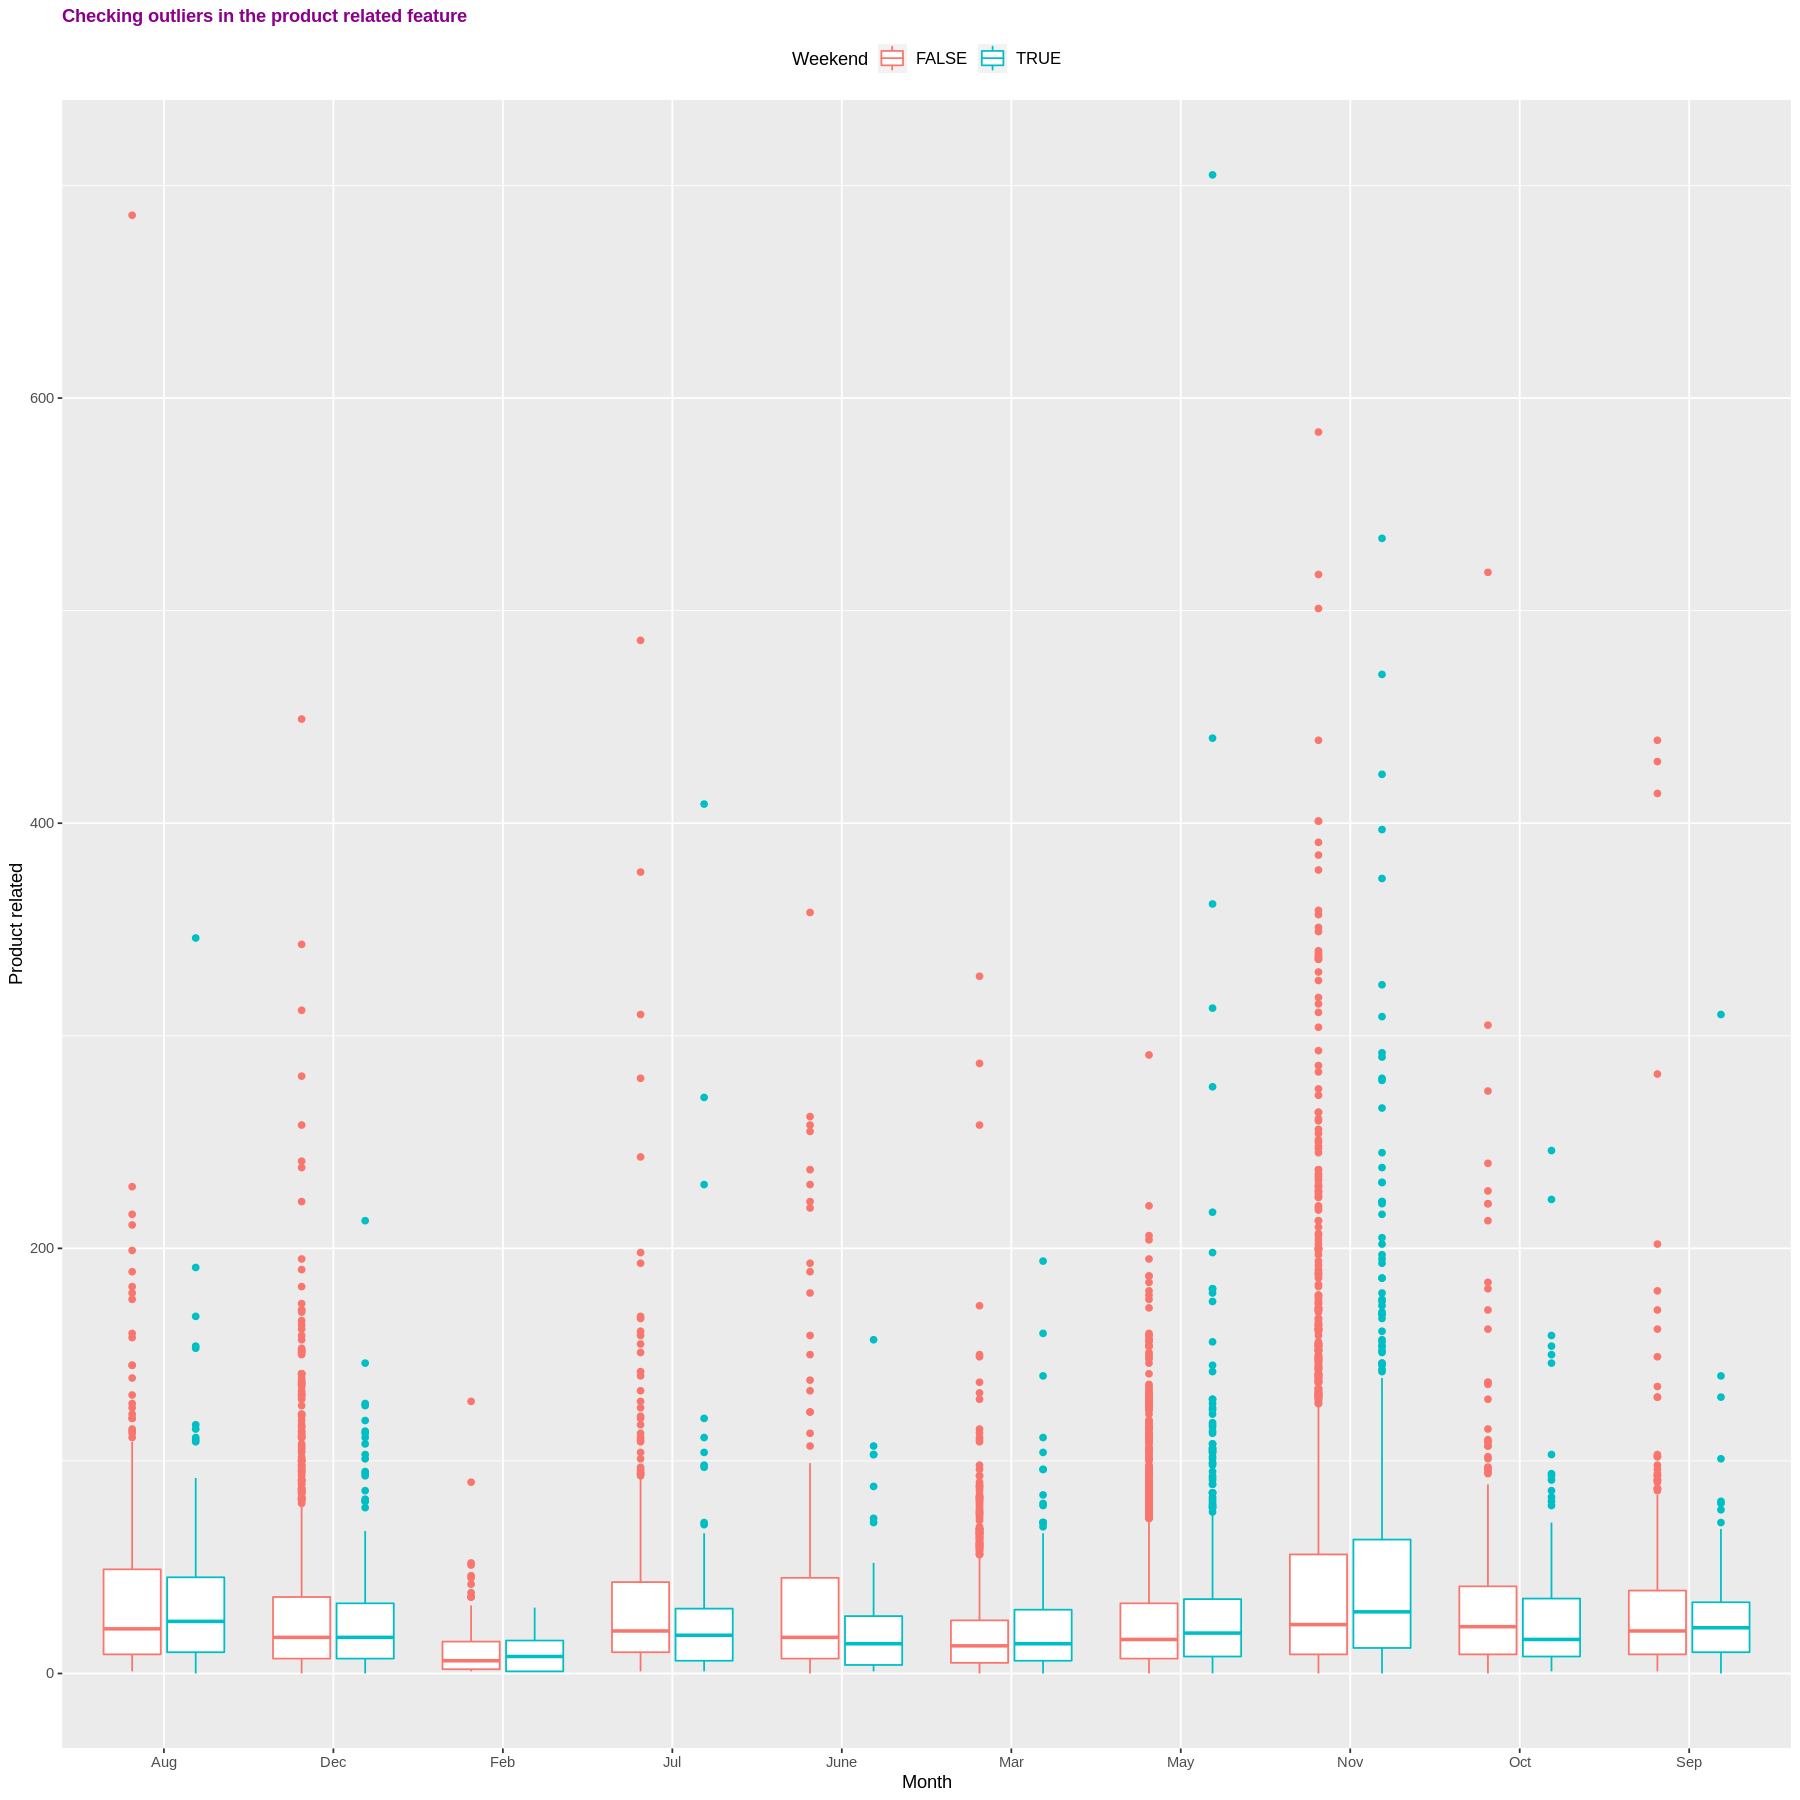

In [9]:
# Checking for outliers and anomalies
## Checking for outliers and anomalies

# Plotting boxplots
options(repr.plot.width = 15, repr.plot.height = 15)
ggplot(customers, aes(Month, ProductRelated, col = Weekend)) + 
  geom_boxplot() + 
  labs(x = 'Month', y = 'Product related', title = 'Checking outliers in the product related feature') + 
  theme(legend.position = 'top', legend.text = element_text(size = 10),
       plot.title = element_text(size = 11, color = 'darkmagenta', face = 'bold'))

# Perfoming Data Cleaning

In [10]:
# Removing the missing data
customers = na.omit(customers)

In [11]:
# Removing the duplicates
library (dplyr)
customers = customers %>% distinct()

# Perfoming EDA

In [13]:
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(fac_cols)` instead of `fac_cols` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



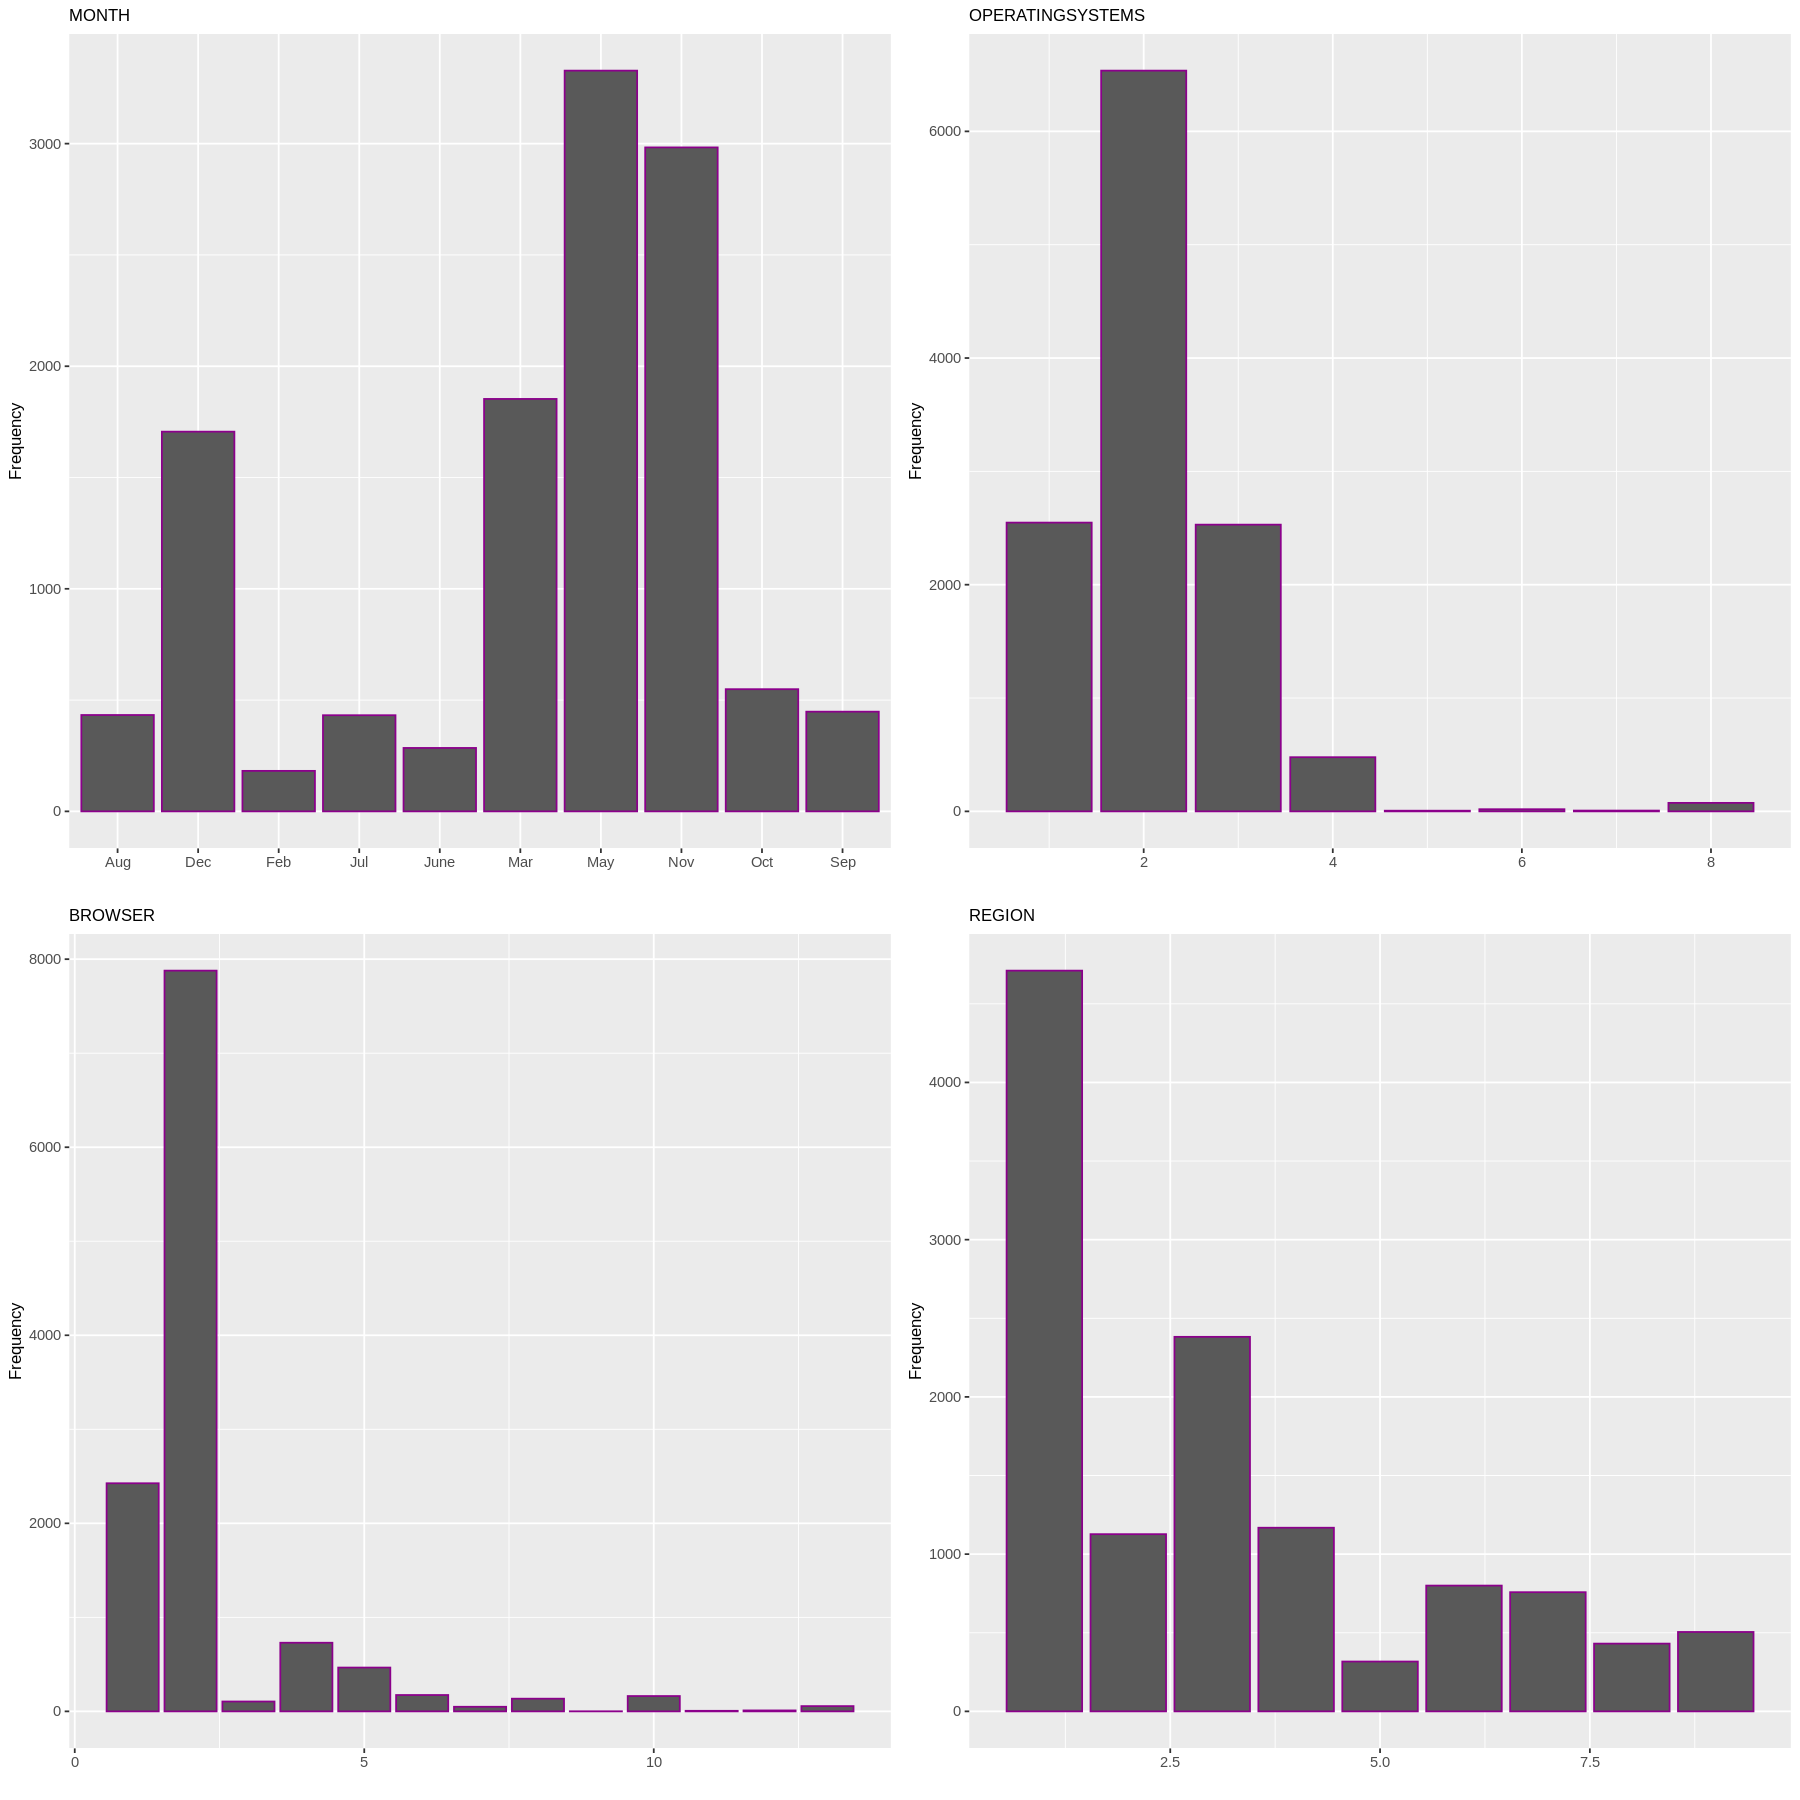

In [14]:
# Plotting histograms
library(ggplot2)
library(gridExtra)
library(grid)

fac_cols = c('Month', 'OperatingSystems',	'Browser',	'Region')

columns = colnames(select(customers, fac_cols))

p = list()
options(repr.plot.width = 15, repr.plot.height = 15)
for (i in 1:4){
  p[[i]] = ggplot(customers, aes_string(columns[i])) + geom_bar(color = 'darkmagenta') + labs(y = 'Frequency', x = '', title = toupper(columns[i])) +
  theme(plot.title = element_text(size = 10),
       axis.title.y = element_text(size = 10))
}

do.call(grid.arrange, p)

In [15]:
summary(customers)

 Administrative  Administrative_Duration Informational    
 Min.   : 0.00   Min.   :  -1.00         Min.   : 0.0000  
 1st Qu.: 0.00   1st Qu.:   0.00         1st Qu.: 0.0000  
 Median : 1.00   Median :   9.00         Median : 0.0000  
 Mean   : 2.34   Mean   :  81.68         Mean   : 0.5088  
 3rd Qu.: 4.00   3rd Qu.:  94.75         3rd Qu.: 0.0000  
 Max.   :27.00   Max.   :3398.75         Max.   :24.0000  
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  8.00   1st Qu.:  193.6        
 Median :   0.00        Median : 18.00   Median :  609.5        
 Mean   :  34.84        Mean   : 32.06   Mean   : 1207.5        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1477.6        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
  BounceRates        ExitRates         PageValues        SpecialDay     
 Min.   :0.00000   Min.   :0.00000   Min.   :  0.000   Min.

In [16]:
# factor variables changed to its correct class 
customers$OperatingSystems=as.factor(customers$OperatingSystems)
customers$Browser=as.factor(customers$Browser)
customers$Region=as.factor(customers$Region)
customers$Weekend=as.factor(customers$Weekend)
customers$Revenue=as.factor(customers$Revenue)
customers$TrafficType=as.factor(customers$TrafficType)
customers$VisitorType=as.factor(customers$VisitorType)
customers$Month=as.factor(customers$Month)

In [17]:
install.packages("caret")
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [ ]:
# The percentage of purchases in each month
month_rev <- customers %>% group_by(Month) %>% 
  summarize(Purchase = sum(Revenue==1)/length(Revenue))

months <- c('Feb','Mar','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')

ggplot(month_rev, aes(Month, Purchase)) + 
  geom_bar(stat = "identity") +
  ggtitle('The Percentage of Purchases in Different Months') +
  ylab('% Purchases') +
  theme_bw() + theme(panel.grid.major=element_blank(), panel.grid.minor=element_blank()) +
  scale_x_discrete(labels = months)

In [26]:
install.packages("ggcorrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Calculate % purchases at special days
special_rev <- customers %>% group_by(SpecialDay) %>% 
  summarize(Purchase = sum(Revenue==1)/length(Revenue))

ggplot(special_rev, aes(factor(SpecialDay), Purchase)) + 
  geom_bar(stat = "identity", width = 0.5) +
  ggtitle('The Percentage of Purchases at Special Days') +
  ylab('% Purchases') + xlab('Closeness to a Special Day') + 
  theme_bw() + theme(panel.grid.major=element_blank(), panel.grid.minor=element_blank())

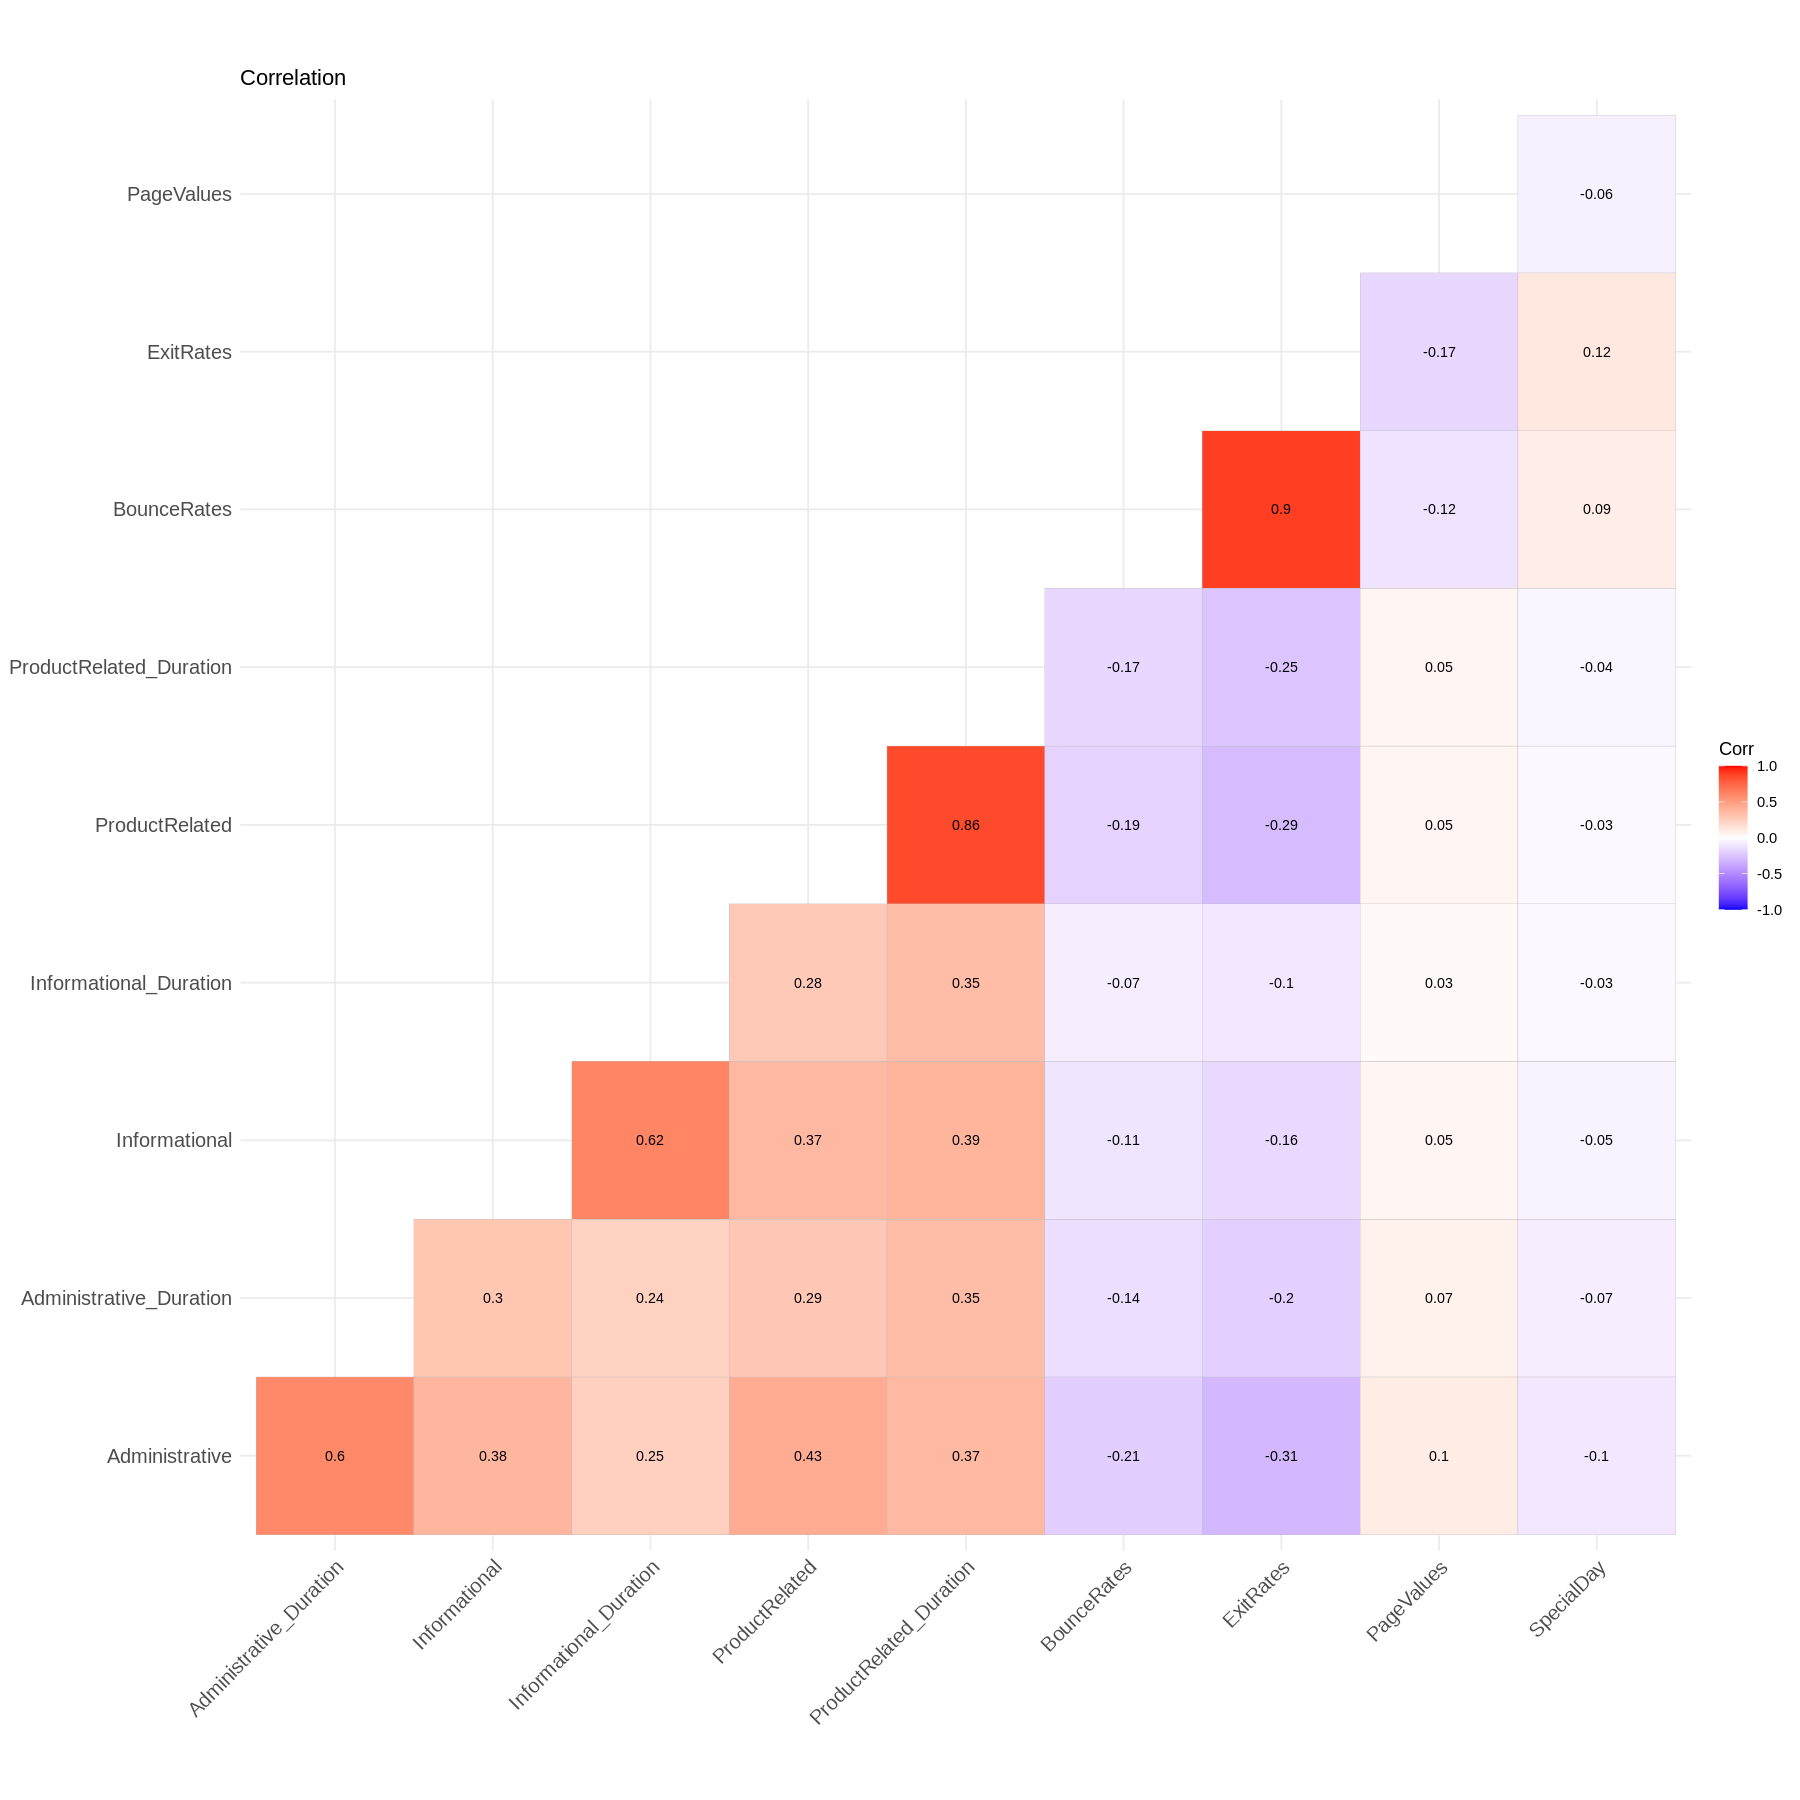

In [32]:
library(ggcorrplot)
ggcorrplot(cor(customers[,1:10]), type="lower", lab = TRUE, lab_size = 3) + 
  ggtitle("Correlation")

  # The columns with numeric data 

# Implementing the Solution

## K-Means Clustering

Creating dummy variables for clustering

In [26]:
# dummyVars() function to create a full set of dummy variables.
# The dummyVars() method works on the categorical variables. 
# It is to be noted that the second line contains the argument fullrank=T, 
# which will create n-1 columns for a categorical variable with n unique levels

dmy <- dummyVars(" ~ .", data = customers, fullRank = T)
customers_transformed <- data.frame(predict(dmy, newdata = customers))

glimpse(customers_transformed)

Rows: 12,199
Columns: 69
$ Administrative                <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0…
$ Administrative_Duration       <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0…
$ Informational                 <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Informational_Duration        <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0…
$ ProductRelated                <dbl> 1, 2, 1, 2, 10, 19, 1, 1, 2, 3, 3, 16, 7…
$ ProductRelated_Duration       <dbl> 0.000000, 64.000000, -1.000000, 2.666667…
$ BounceRates                   <dbl> 0.200000000, 0.000000000, 0.200000000, 0…
$ ExitRates                     <dbl> 0.200000000, 0.100000000, 0.200000000, 0…
$ PageValues                    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ SpecialDay                    <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, …
$ Month.Dec                     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Month.Feb                     <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ Month.Jul    

In [28]:
pkgs <- c("factoextra",  "NbClust")
install.packages(pkgs)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘ggrepel’




Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



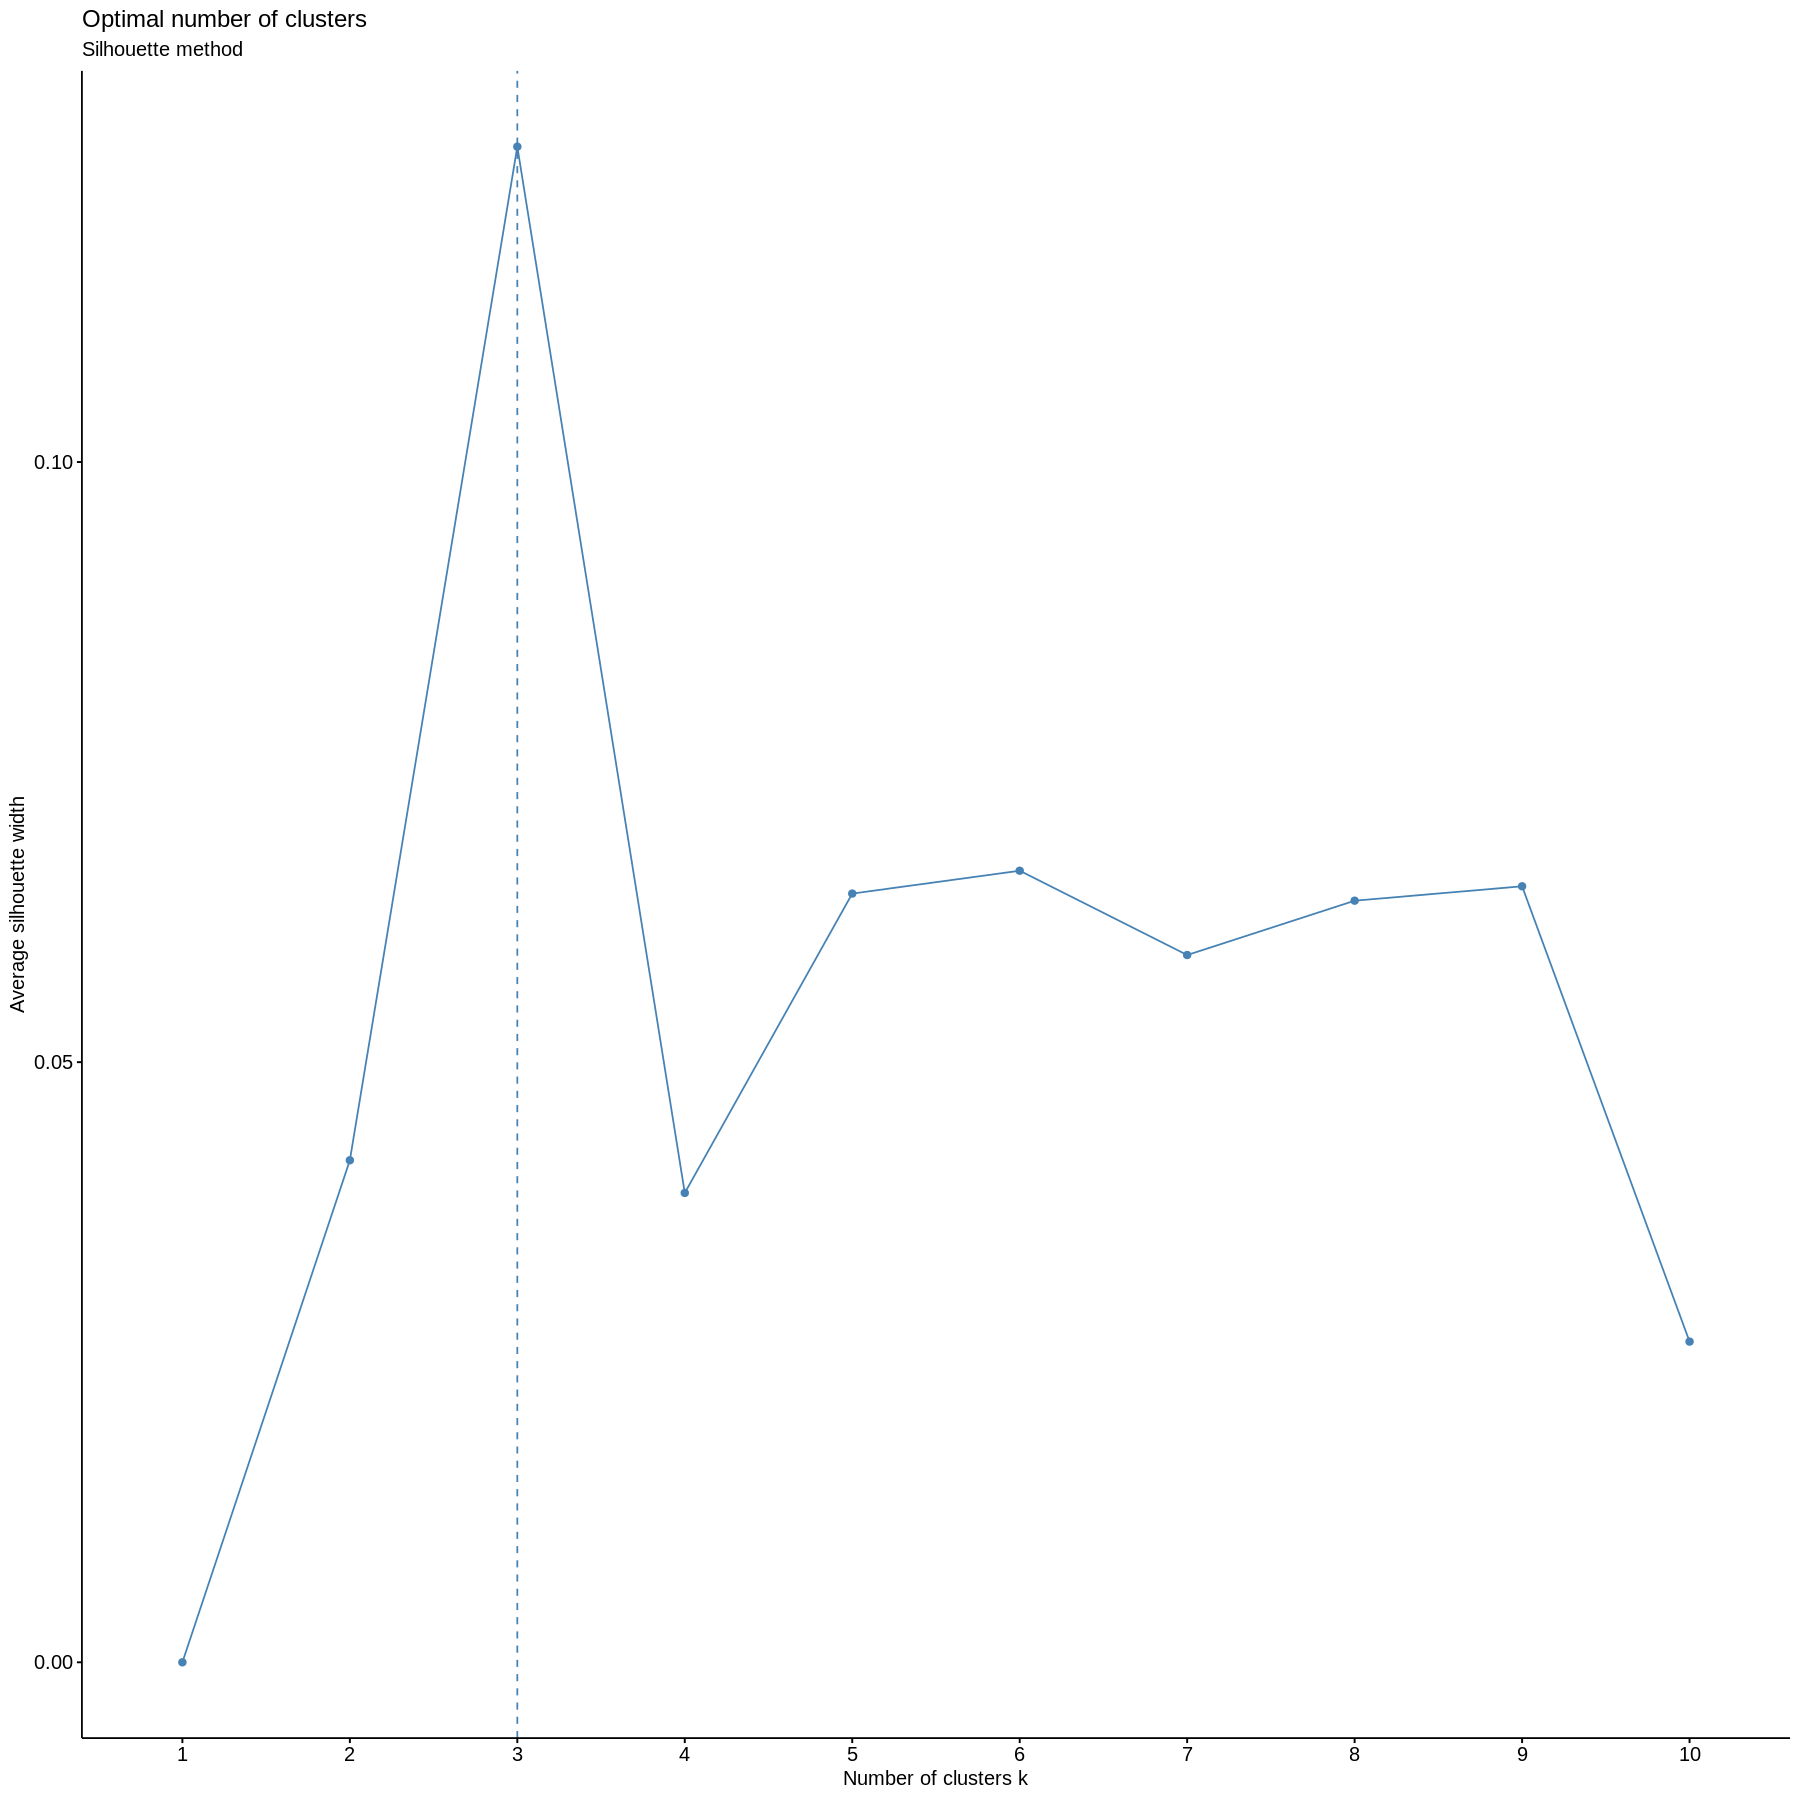

In [29]:
# Silhouette method
library(NbClust)
library(factoextra)
fviz_nbclust(customers_transformed, kmeans, method = "silhouette") +
  labs(subtitle = "Silhouette method")

Normalizing data

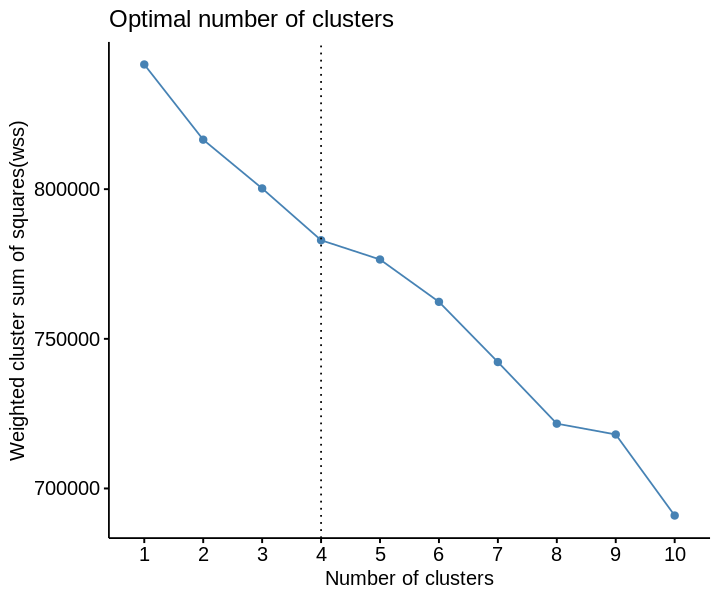

In [30]:
# Finding the optimal number of clusters using the elbow method
options(repr.plot.width = 6, repr.plot.height = 5)
fviz_nbclust(customers_transformed, kmeans, method = 'wss') + 
  geom_vline(xintercept = 4, linetype = 3) + 
  labs(x = 'Number of clusters', y = 'Weighted cluster sum of squares(wss)')

In [31]:
# Kmeans cluster
KM = kmeans(customers_transformed, 4)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“`select_()` was deprecated in dplyr 0.7.0.
Please use `select()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”
Warning message:
“`group_by_()` was deprecated in dplyr 0.7.0.
Please use `group_by()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


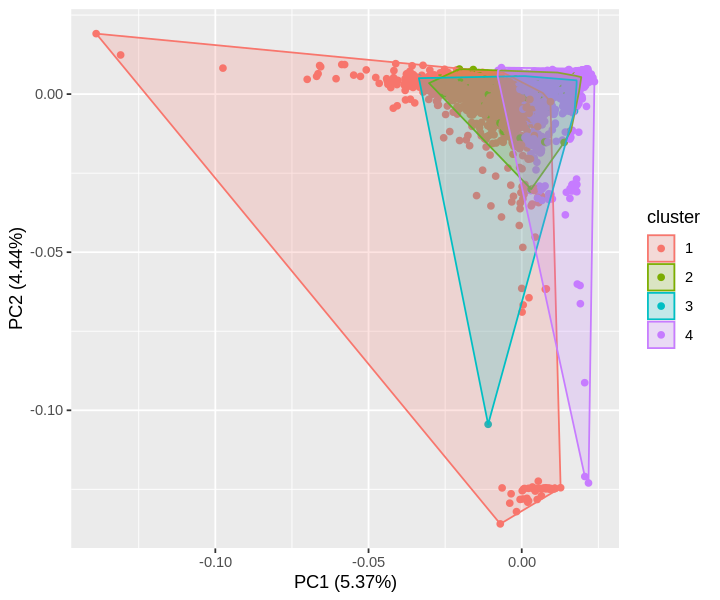

In [33]:
# Cluster plot
install.packages("ggfortify")
library(ggfortify)
autoplot(KM, customers_transformed, frame=TRUE)

In [34]:

customer_cluster <- data.frame(customers_transformed,
                               cluster = as.factor(KM$cluster)
)
head(customer_cluster)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,⋯,TrafficType.16,TrafficType.17,TrafficType.18,TrafficType.19,TrafficType.20,VisitorType.Other,VisitorType.Returning_Visitor,Weekend.TRUE,Revenue.TRUE,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-0.7025315,-0.4601081,-0.3988128,-0.2462725,-0.6963635,-0.6289343,3.954699721,3.4273070,-0.3190356,-0.3103105,⋯,-0.01568318,-0.009053946,-0.02864166,-0.03735488,-0.1267832,-0.08175404,0.4124972,-0.5528638,-0.4305688,4
2,-0.7025315,-0.4601081,-0.3988128,-0.2462725,-0.6739424,-0.5955997,-0.450343788,1.2650121,-0.3190356,-0.3103105,⋯,-0.01568318,-0.009053946,-0.02864166,-0.03735488,-0.1267832,-0.08175404,0.4124972,-0.5528638,-0.4305688,4
3,-0.7025315,-0.4657410,-0.3988128,-0.2533417,-0.6963635,-0.6294551,3.954699721,3.4273070,-0.3190356,-0.3103105,⋯,-0.01568318,-0.009053946,-0.02864166,-0.03735488,-0.1267832,-0.08175404,0.4124972,-0.5528638,-0.4305688,4
4,-0.7025315,-0.4601081,-0.3988128,-0.2462725,-0.6739424,-0.6275453,0.650917089,2.1299300,-0.3190356,-0.3103105,⋯,-0.01568318,-0.009053946,-0.02864166,-0.03735488,-0.1267832,-0.08175404,0.4124972,-0.5528638,-0.4305688,4
5,-0.7025315,-0.4601081,-0.3988128,-0.2462725,-0.4945739,-0.3020990,-0.009839437,0.1838646,-0.3190356,-0.3103105,⋯,-0.01568318,-0.009053946,-0.02864166,-0.03735488,-0.1267832,-0.08175404,0.4124972,1.8086156,-0.4305688,4
6,-0.7025315,-0.4601081,-0.3988128,-0.2462725,-0.2927843,-0.5486101,-0.102577188,-0.3661929,-0.3190356,-0.3103105,⋯,-0.01568318,-0.009053946,-0.02864166,-0.03735488,-0.1267832,-0.08175404,0.4124972,-0.5528638,-0.4305688,4


In [37]:
# Cheking the numbers in each cluster
customer_cluster %>% group_by(cluster) %>% summarize(count=n())

cluster,count
<fct>,<int>
1,5038
2,311
3,260
4,6590


## Hierarchial Clustering

In [39]:
# Heirachical

d <- dist(customers_transformed, method = "euclidean")

In [40]:
# We then hierarchical clustering using the Ward's method
# ---
# 
res.hc <- hclust(d, method = "ward.D2" )

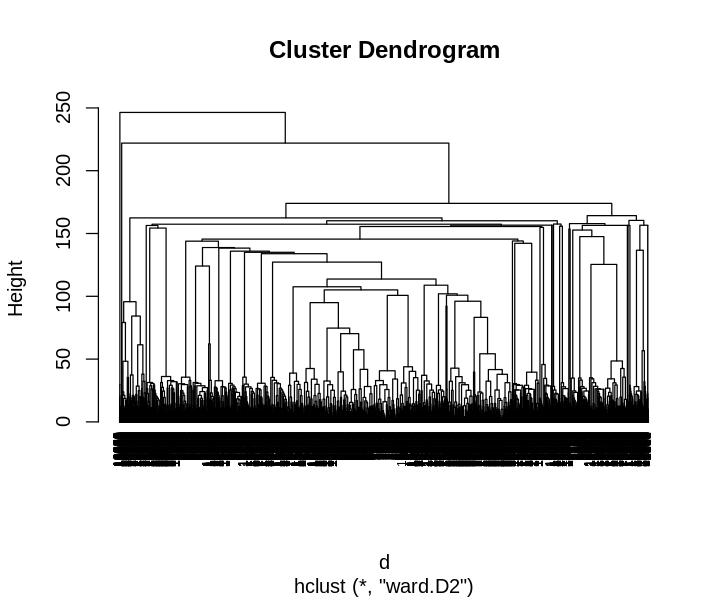

In [41]:
# Lastly, we plot the obtained dendrogram
# ---
# 
plot(res.hc, cex = 0.6, hang = -1)

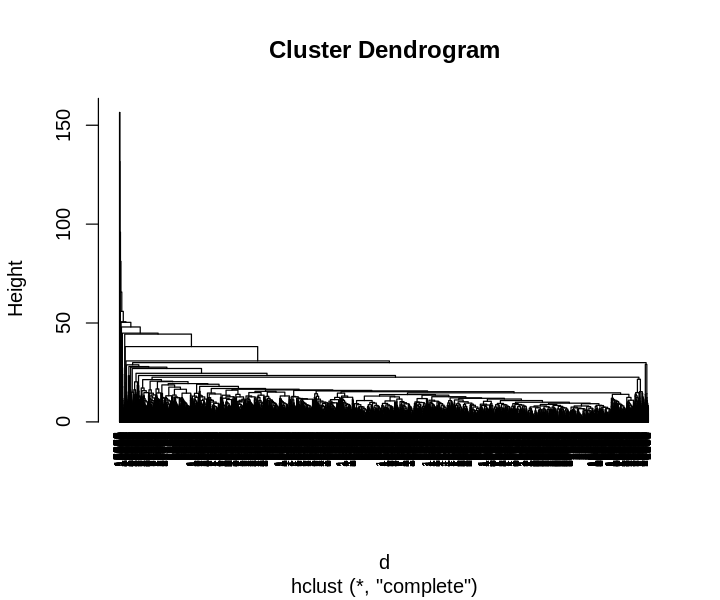

In [42]:
# Hierarchical clustering using Complete Linkage
hc1 <- hclust(d, method = "complete" )

# Plot the obtained dendrogram
plot(hc1, cex = 0.6, hang = -1)

In [43]:
# Ward's method
hc5 <- hclust(d, method = "ward.D2" )

# Cut tree into 4 groups
sub_grp <- cutree(hc5, k = 4)

# Number of members in each cluster
table(sub_grp)

sub_grp
    1     2     3     4 
 1844 10301    48     6 

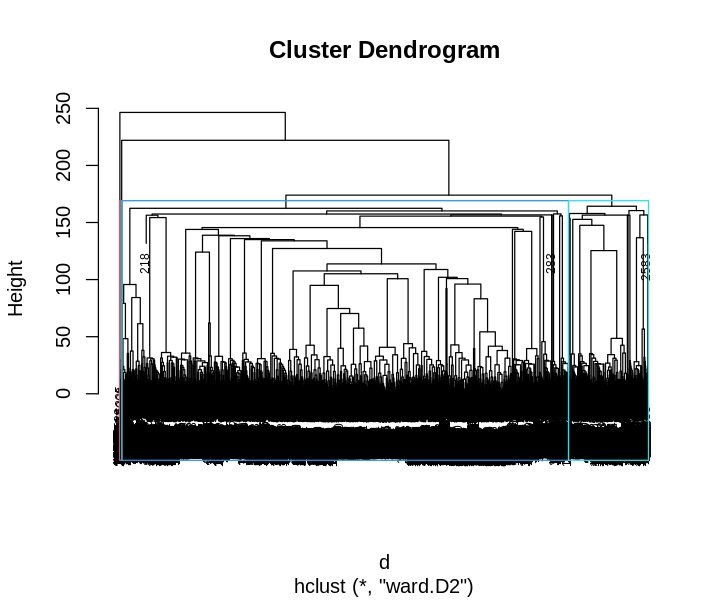

In [44]:
plot(hc5, cex = 0.6)
rect.hclust(hc5, k = 4, border = 2:5)

# Conclusions and recommendations

# Challenging the Solution

The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.

# Follow Up Questions

At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



a). Did we have the right data?


yes


b). Do we need other data to answer our question?



Yes, it would be beneficial to our analysis


c). Did we have the right question?


yes